# Movie Rating Prediction with Python

## Project Overview
The Movie Rating Prediction project involves analyzing a dataset containing information about Indian movies. The dataset includes details like movie name, year, duration, genre, rating, votes, director, and three main actors. The data will be used to build a predictive model for movie ratings and extract valuable insights from the movie industry.

## Business Understanding
The film industry relies on understanding the factors that influence movie success. Accurately predicting movie ratings can aid in decision-making, such as choosing the right actors, directors, and genres, as well as determining marketing strategies. This project aims to provide insights and a model for predicting movie ratings, which can be invaluable for stakeholders in the movie industry.

#### Objectives

* Develop a predictive model: Create a machine learning model to predict movie ratings based on the provided dataset.This is essentially a regression problem, where we aim to estimate the numerical movie ratings based on various features.

* Identify influential factors: Analyze the dataset to determine which factors (e.g., genre, director, actors) have the most significant impact on movie ratings.

* Provide actionable insights: Offer insights to the film industry stakeholders to make informed decisions about movie production, casting, and marketing.

## Data Understanding
The dataset is obtained from Kaggle: [IMDb India Movies](https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies)     

The dataset has the following columns:

* Name: Movie name 
* Duration: Movie duration 
* Genre: Movie genre 
* Rating: Movie rating 
* Votes: Number of votes received 
* Director: Movie director 
* Actor 1: First main actor  
* Actor 2: Second main actor 
* Actor 3: Third main actor 

The Target variable is Rating

In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns



In [4]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [8]:
df.shape

(15509, 10)

In [9]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [10]:
df.dropna(subset=['Rating'], inplace=True)

In [11]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [12]:
df['Genre'].fillna('Unknown', inplace=True)

In [13]:
df.isna().sum()

Name           0
Year           0
Duration    2068
Genre          0
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [14]:
# Extract numeric values from 'Duration' and convert to integers
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)

# Impute missing values in 'Duration' with the mean or median
df['Duration'].fillna(df['Duration'].median(), inplace=True)

In [15]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [16]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [19]:
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)

In [20]:
df['Votes'] = df['Votes'].str.extract(r'(\d+)').astype(int)

In [21]:
df.dtypes

Name         object
Year          int32
Duration    float64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [22]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


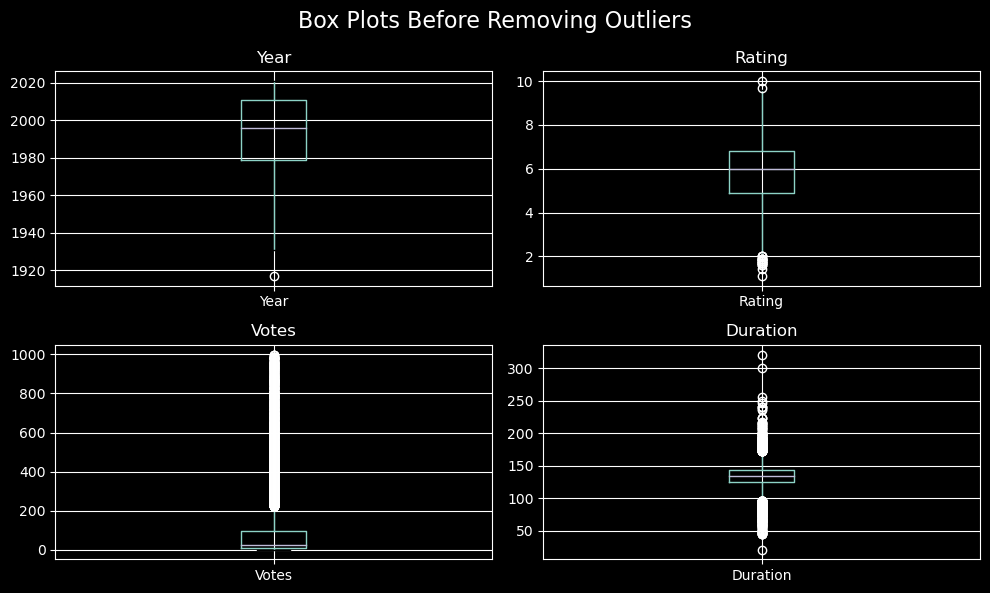

Number of rows with outliers before removal: 1415


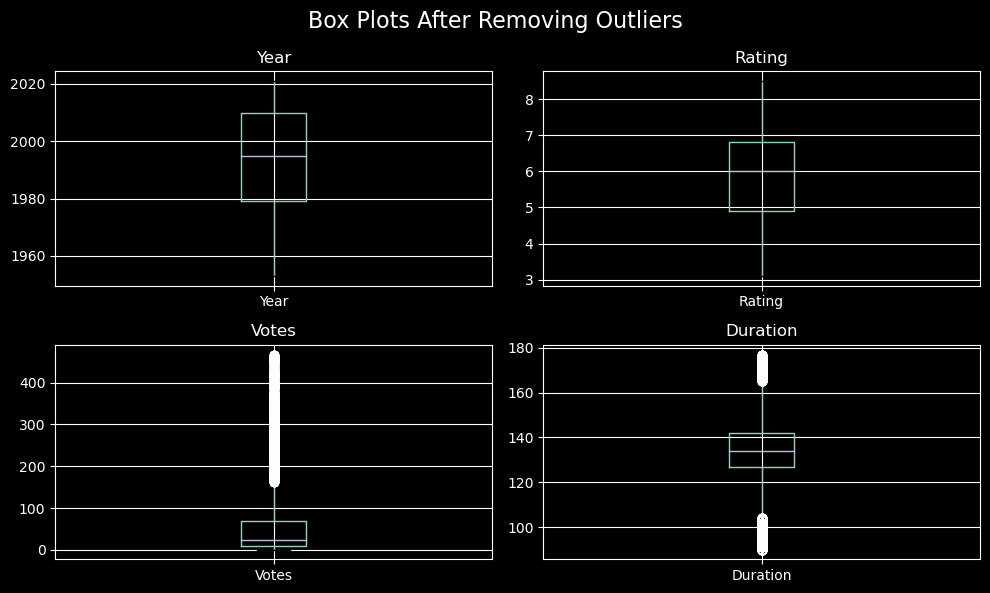

Number of rows after removing outliers: 6212


In [23]:
# Set the dark_background style
plt.style.use('dark_background')

# Define the numerical columns you want to check for outliers
numerical_columns = ['Year', 'Rating', 'Votes', 'Duration']

# Create box plots before removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Calculate z-scores for numerical columns
z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Set a z-score threshold to identify outliers (e.g., 2 or -2 for a 95% confidence interval)
z_score_threshold = 2

# Identify outliers based on z-scores
outliers = z_scores[(z_scores.abs() > z_score_threshold).any(axis=1)]

# Display the number of rows with outliers before removal
print("Number of rows with outliers before removal:", len(outliers))

# Remove outliers and create a new DataFrame (df_cleaned)
df_cleaned = df[~((z_scores.abs() > z_score_threshold).any(axis=1))]

# Create box plots after removing outliers
plt.figure(figsize=(10, 6))
plt.suptitle('Box Plots After Removing Outliers', fontsize=16)

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    df_cleaned.boxplot(column=[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

# Display the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df_cleaned))


## Exploratory Data Analysis

#### Univariate analysis
Univariate analysis focuses on understanding the distribution and characteristics of individual variables

#### Rating Analysis

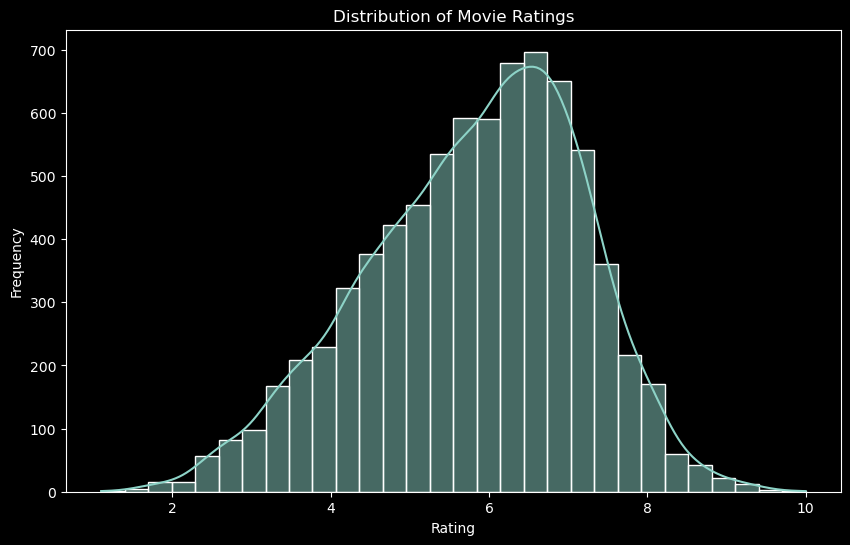

In [24]:
# rating analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


$Inferences$ 
*  Rating Distribution: The histogram shows a slightly right-skewed distribution with a peak around a 7 rating value.
*  Common Rating Range falls between 5 to 7.
* All ratings are positive 
* There are few movies rated below 2 and above 8

#### Votes Analysis

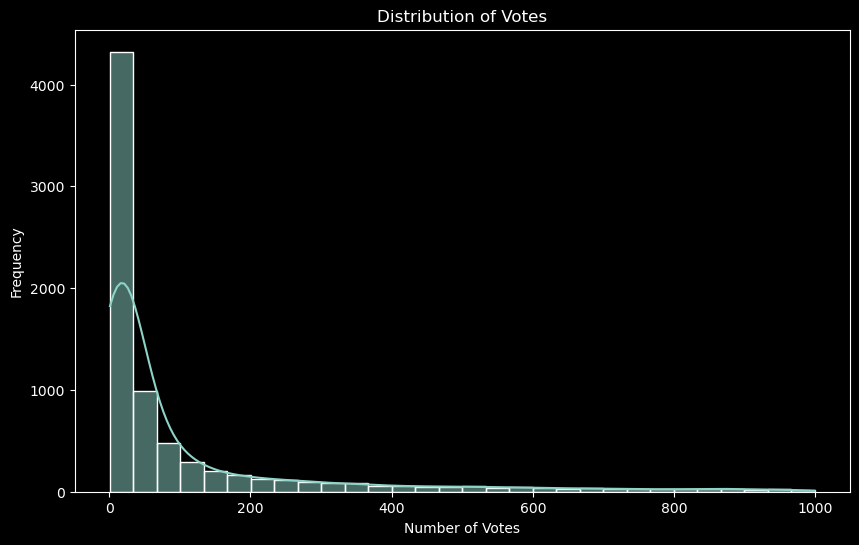

In [25]:
# Votes Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Votes', bins=30, kde=True)
plt.title('Distribution of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

$Inference$ 
* The distribution of votes is right-skewed, with the majority of movies receiving a relatively low number of votes. This suggests that many movies in the dataset may not be widely recognized or popular, as they have received fewer votes
* The long tail towards higher vote counts indicates that there are a smaller number of movies that have garnered a significant number of votes
* Popularity Range is between 0 and 40



### Top 10 Directors with the Most Movies Directed

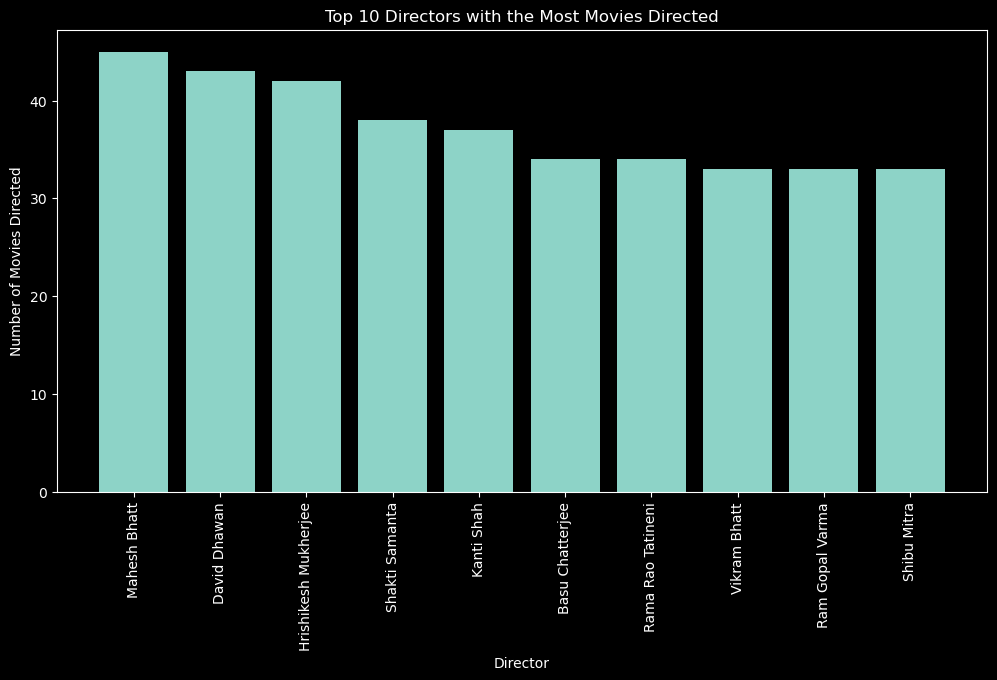

In [31]:
# Count the number of movies directed by each director
director_counts = df['Director'].value_counts()

# Select the top 10 directors with the most movies directed
top_10_directors = director_counts.head(10)

# Create a bar plot to visualize the top 10 directors with the most movies directed
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Most Movies Directed')
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=90)
plt.show()


$Inference$ 
* The above directors are quite prolific in their careers.
* Mahesh Bhatt directed the most movies

### Top 10 Actors with the Most Movie Appearances

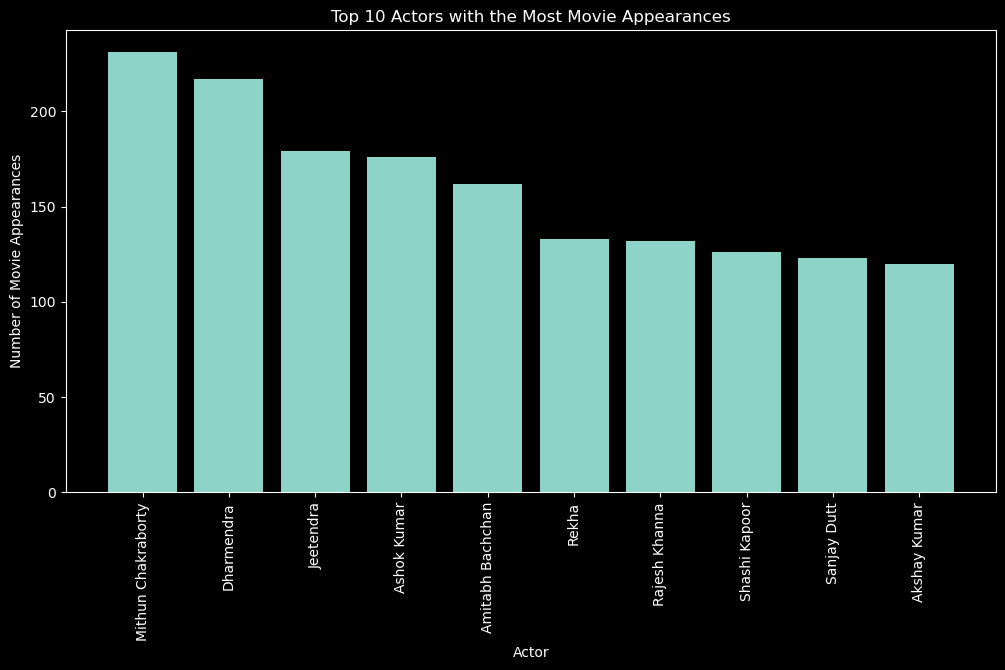

In [35]:
# Count the number of movies in which each actor starred
actor_counts = df[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts()

# Select the top 10 actors with the most movie appearances
top_10_actors = actor_counts.head(10)

# Create a bar plot to visualize the top 10 actors with the most movie appearances
plt.figure(figsize=(12, 6))
plt.bar(top_10_actors.index, top_10_actors.values)
plt.title('Top 10 Actors with the Most Movie Appearances')
plt.xlabel('Actor')
plt.ylabel('Number of Movie Appearances')
plt.xticks(rotation=90)
plt.show()

$inference$ 
* Prolific Actors: The top 10 actors have made a substantial number of movie appearances, indicating their prolific careers in the film industry
* The actor who appeared the most in these movies is Mithun Chakraborty
* Collaboration Opportunities: Filmmakers and producers can consider collaborating with these experienced actors to enhance the credibility and appeal of their projects


### Bivariate Analysis
Bivariate analysis helps you understand the relationships between two variables

### Top 10 Directors with the Highest-Rated Movies

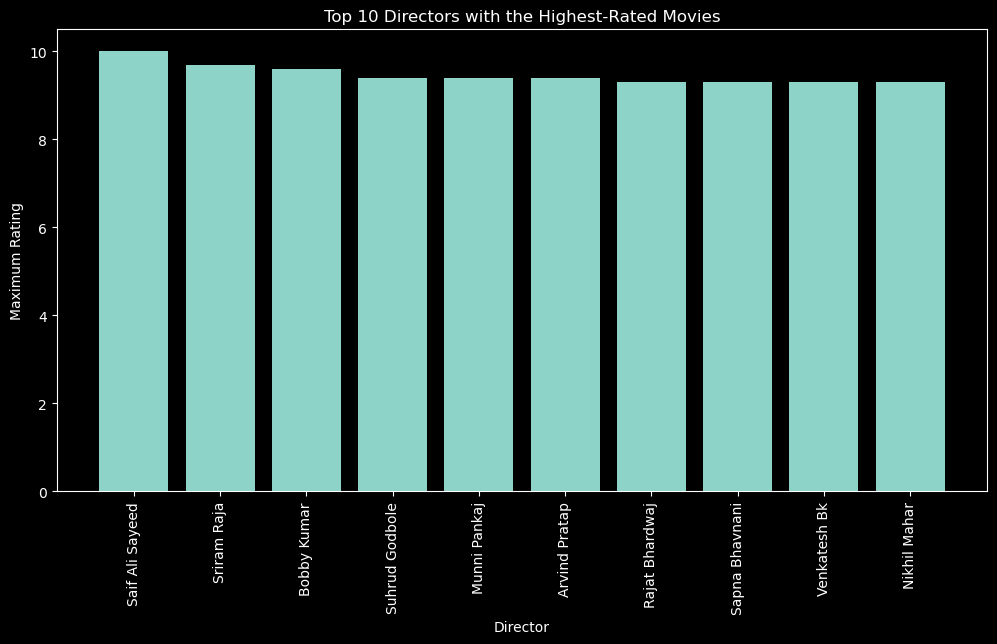

In [32]:
# Group the data by director and find the maximum rating within each group
directors_max_rating = df.groupby('Director')['Rating'].max()

# Sort the directors by their highest rating in descending order and select the top 10
top_10_directors = directors_max_rating.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 directors with the highest-rated movies
plt.figure(figsize=(12, 6))
plt.bar(top_10_directors.index, top_10_directors.values)
plt.title('Top 10 Directors with the Highest-Rated Movies')
plt.xlabel('Director')
plt.ylabel('Maximum Rating')
plt.xticks(rotation=90)
plt.show()


$Inference$ 
* Saif Ali Sayeed has directed the most succcessful Movies among other directors.This shows that the likelyhood of a movie to be rated high if directed by him is high.
*  Stakeholders in the film industry might consider collaborating with these directors to ensure the production of well-received movies.

### Top 10 Highly Rated Movie Genres

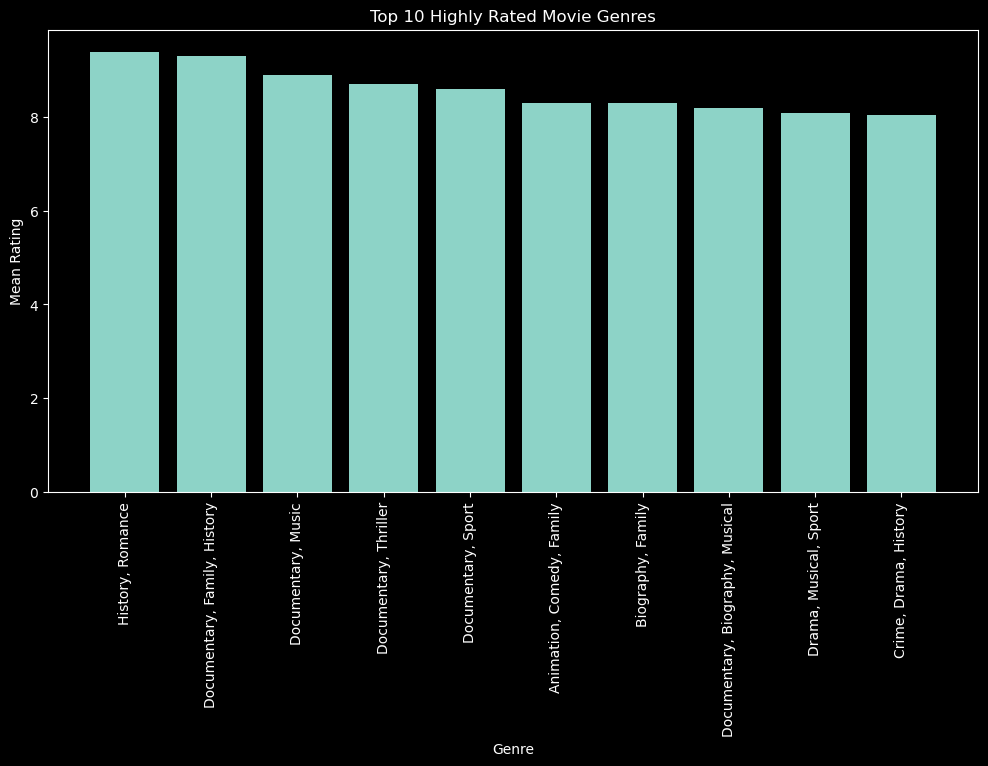

In [33]:
# Group the data by genre and calculate the mean rating for each genre
genre_mean_ratings = df.groupby('Genre')['Rating'].mean()

# Sort the genres by mean rating in descending order and select the top 10
top_10_genres = genre_mean_ratings.sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top 10 highly rated genres
plt.figure(figsize=(12, 6))
plt.bar(top_10_genres.index, top_10_genres.'values)
plt.title('Top 10 Highly Rated Movie Genres)
plt.xlabel('Genre')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.show()


$inference$
* Genre Popularity: The top 10 highly rated genres are likely to be popular among audiences, as reflected in their mean ratings
* History, Romance genre has the highes rating hence wise to investing in the genre
* Critical Acclaim: High mean ratings often indicate that these genres receive positive reviews and critical acclaim from both audiences and critics.
* Filmmakers, actors, and production companies may consider collaborating within these genres to create well-received movies.

#### Multivariate Analysis
Multivariate analysis involves exploring the relationships between more than two variables.

### Correlation Matrix

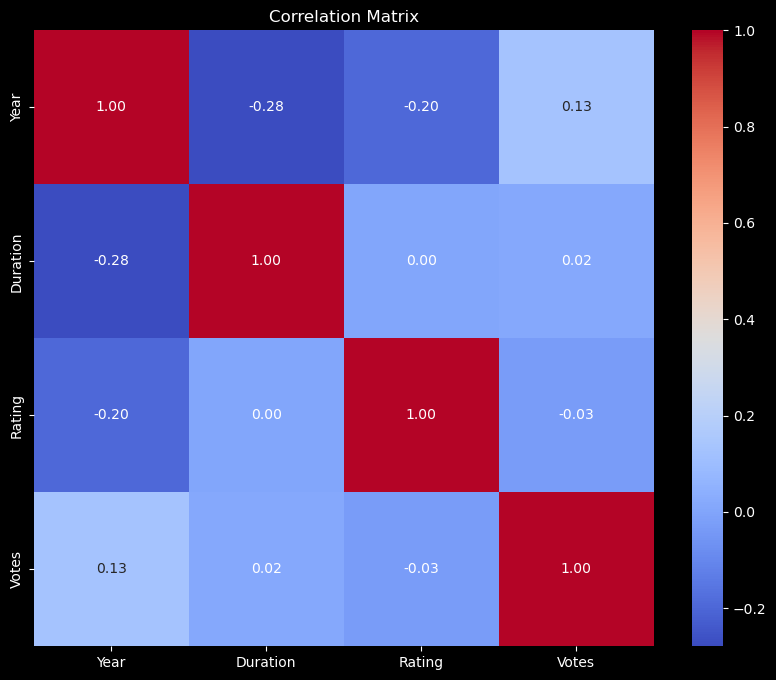

In [38]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The variables are not Highly correlated. The absence of strong correlations between numerical variables is a positive sign, as it reduces the risk of multicollinearity in regression analysis

### Pairplot

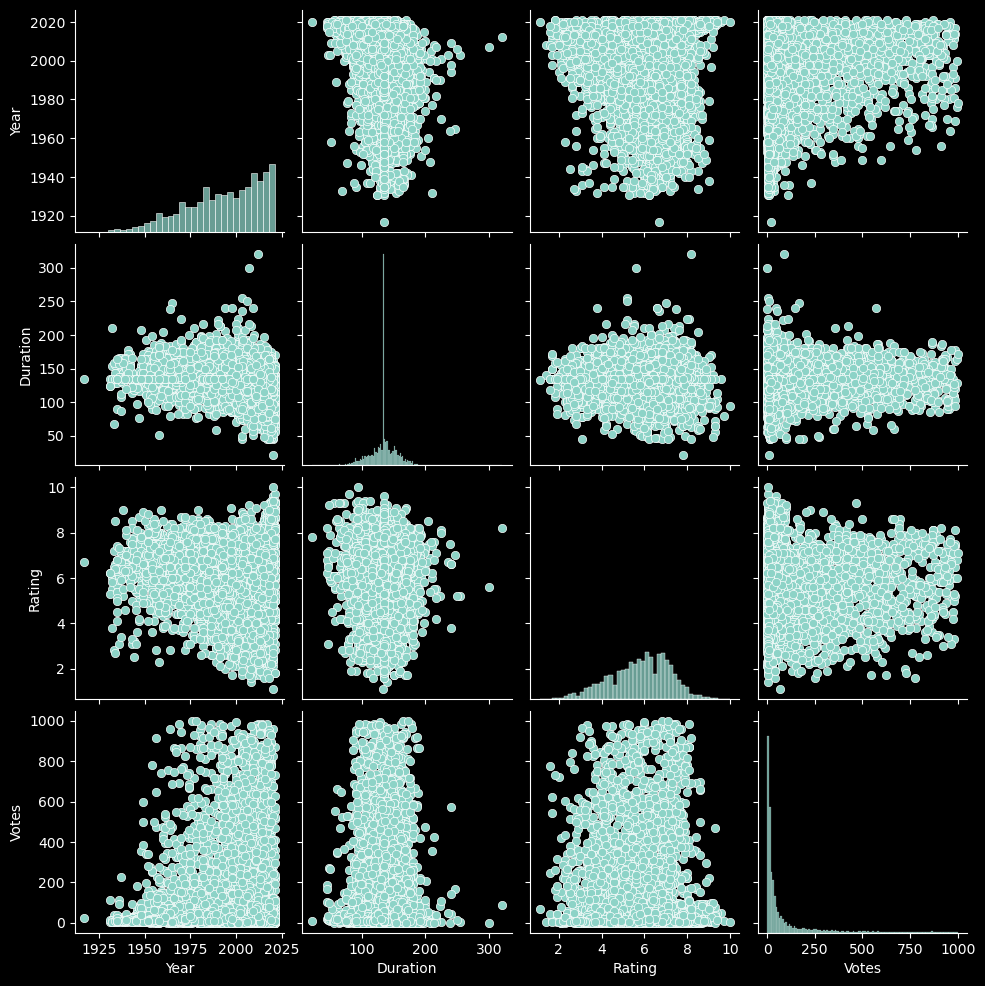

In [39]:
# Select the numerical variables for the pair plot
numerical_columns = df.select_dtypes(include=['number'])

# Create a pair plot for the numerical variables
sns.pairplot(numerical_columns)
plt.show()

No strong correlation between variables

## Data Preprocessing